In [31]:
import numpy as np
import pandas as pd
import os
from datetime import datetime,timedelta
import math
import matplotlib.pyplot as plt
import seaborn  



In [32]:
from_str='2022-11-01'
to_str='2023-02-28'
feq ='M'  

In [33]:
data_file='data/4CoreETFWorld.csv'
title='3CoreETFWorld'
report_path=f'report'


print(report_path)

report


In [34]:
# build period datafrme
period_index=pd.date_range(start=from_str,end=to_str, freq=feq)
print(period_index)

DatetimeIndex(['2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='M')


In [35]:
fundPerfByPeriod_df=pd.DataFrame(data=list(period_index),columns=['End_Date'])
fundPerfByPeriod_df['Start_Date']=np.nan
fundPerfByPeriod_df=fundPerfByPeriod_df[['Start_Date','End_Date']]
fundPerfByPeriod_df

,Start_Date,End_Date
0,NaN,2022-11-30
1,NaN,2022-12-31
2,NaN,2023-01-31
3,NaN,2023-02-28


In [36]:
print(f"Create the first date of each {feq} by iteration")
for index,row in fundPerfByPeriod_df.iterrows():
    if index==0:
       fundPerfByPeriod_df.iloc[0,0]=datetime.strptime(from_str,'%Y-%m-%d')
    else:
        # get End_Date(last day of Year, Quater,Month) of previouse row 
        prev_end_date= fundPerfByPeriod_df.iloc[index-1,1] 
        start_date=prev_end_date + timedelta(days = 1) # 
        fundPerfByPeriod_df.iloc[index,0]=start_date 
    # print(fundPerfByPeriod_df) 
    # print(f"=================index={index}=================")
print(fundPerfByPeriod_df.info())
fundPerfByPeriod_df

Create the first date of each M by iteration
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Date  4 non-null      object        
 1   End_Date    4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 192.0+ bytes
None


,Start_Date,End_Date
0,2022-11-01 00:00:00,2022-11-30
1,2022-12-01 00:00:00,2022-12-31
2,2023-01-01 00:00:00,2023-01-31
3,2023-02-01 00:00:00,2023-02-28


In [37]:
fundPerfByPeriod_df['Start_Date']=pd.to_datetime(fundPerfByPeriod_df['Start_Date'],format='%Y-%m-%d %H:%M:%S')  

fundPerfByPeriod_df['Period']= fundPerfByPeriod_df.apply( lambda item:f"{item['Start_Date'].strftime('%d')}{item['Start_Date'].strftime('%b')}{item['Start_Date'].strftime('%y')}-{item['End_Date'].strftime('%d')}{item['End_Date'].strftime('%b')}{item['End_Date'].strftime('%y')}"  ,axis=1  )
fundPerfByPeriod_df.info()
fundPerfByPeriod_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Date  4 non-null      datetime64[ns]
 1   End_Date    4 non-null      datetime64[ns]
 2   Period      4 non-null      object        
dtypes: datetime64[ns](2), object(1)
memory usage: 224.0+ bytes


,Start_Date,End_Date,Period
0,2022-11-01,2022-11-30,01Nov22-30Nov22
1,2022-12-01,2022-12-31,01Dec22-31Dec22
2,2023-01-01,2023-01-31,01Jan23-31Jan23
3,2023-02-01,2023-02-28,01Feb23-28Feb23


In [38]:
df = pd.read_csv(data_file,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
df.index.set_names('date',inplace=True)
df.rename(columns={'Ticker':'symbol','close':'price'},inplace=True)
df=df[['symbol','price']]
df.info()
print(df.tail(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 328 entries, 2022-10-31 to 2023-02-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  328 non-null    object 
 1   price   328 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB
           symbol       price
date                         
2023-02-22    GLD  169.660004
2023-02-23    GLD  169.570007
2023-02-24    GLD  168.350006
2023-02-27    GLD  169.009995
2023-02-28    GLD  169.779999


In [39]:
list_fund_name=df['symbol'].unique().tolist()  
print(list_fund_name)

['ACWI', 'QQQ', 'AAXJ', 'GLD']


In [40]:
dictPriceOfFund={}
for name in list_fund_name:
  fund_df=df.query('symbol==@name')
  fund_df=fund_df.loc[from_str:to_str,['price']]
  fund_df.sort_index(inplace=True)
  if len(fund_df)  >0:
      dictPriceOfFund[name]=fund_df  
      print(f"======={name} : {len(fund_df)}==========")  
      print(fund_df.tail(3))    
        

=======ACWI : 81==========
                price
date                 
2023-02-24  88.160004
2023-02-27  88.680000
2023-02-28  88.220001
=======QQQ : 81==========
                 price
date                  
2023-02-24  291.850006
2023-02-27  293.940002
2023-02-28  293.559998
=======AAXJ : 81==========
                price
date                 
2023-02-24  65.480003
2023-02-27  65.919998
2023-02-28  65.470001
=======GLD : 81==========
                 price
date                  
2023-02-24  168.350006
2023-02-27  169.009995
2023-02-28  169.779999


In [41]:
report_path=os.path.join (report_path, f"{title}-{feq}-{from_str}_{to_str}")
if not os.path.exists(report_path):
 os.makedirs(report_path)



In [42]:
def create_pct_acc_df(df_temp,start_pct,end_pct):
    df_temp=fund_df.loc[start_pct:end_pct,:]
    df_temp['return_pct']=df_temp['price'].pct_change()  
    df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
    df_temp=df_temp.drop(columns=['price','return_pct'])
    df_temp.fillna(1,inplace=True)   
    return df_temp
    

plot chart line to compare return performace on each period


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

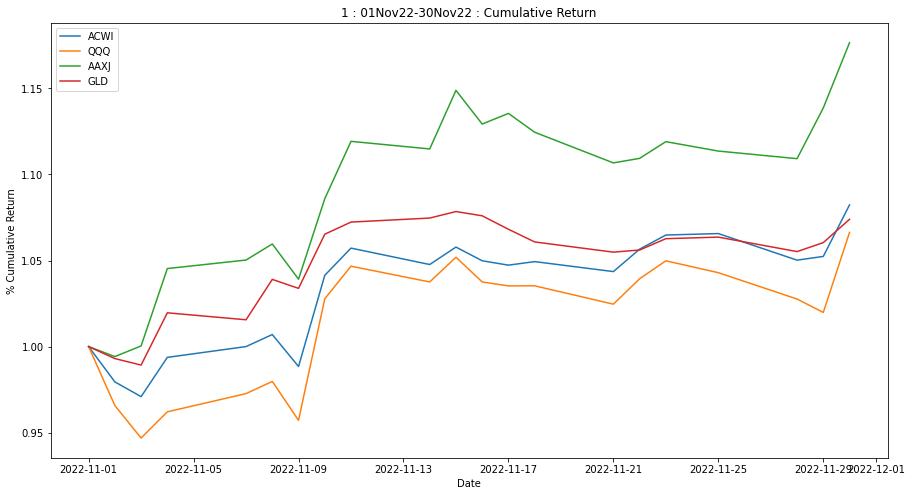

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

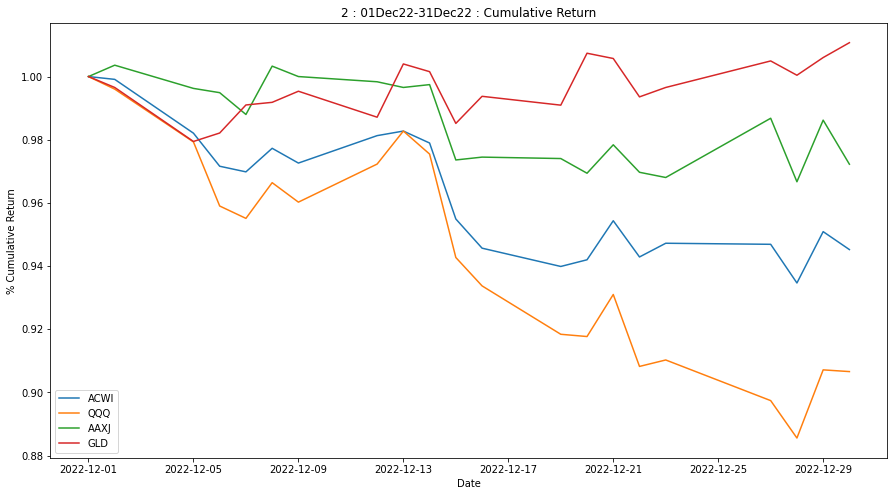

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

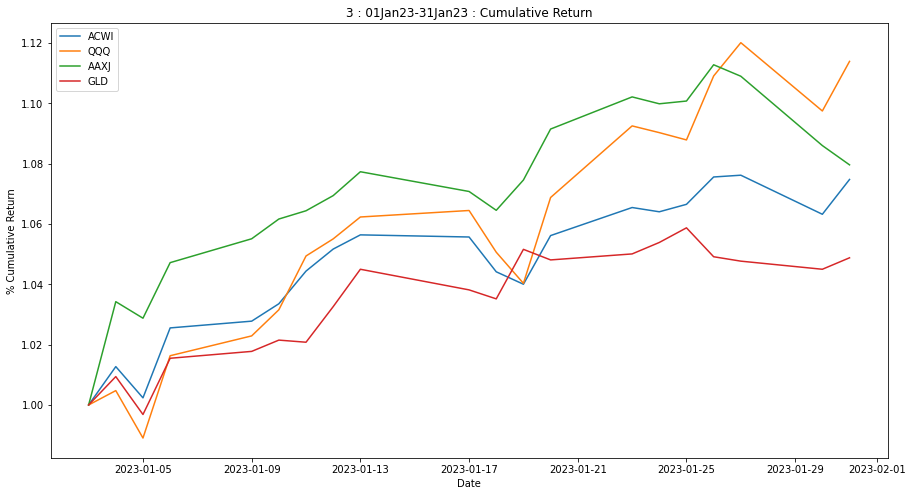

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

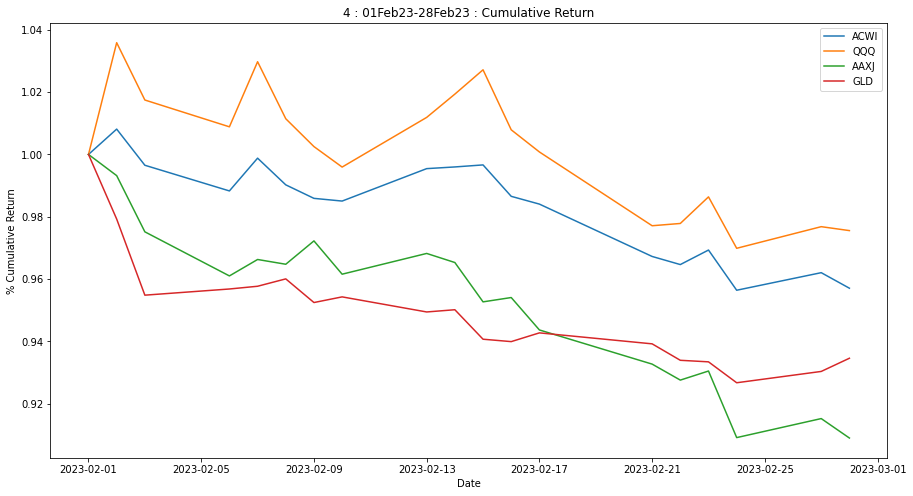

In [43]:
print("plot chart line to compare return performace on each period")
count_pic=0
for index,item in fundPerfByPeriod_df.iterrows():
    start_date=item['Start_Date']
    end_date=item['End_Date'] 
    fig = plt.figure(figsize = (15, 8))
    for fund_name,fund_df in dictPriceOfFund.items():
        df=create_pct_acc_df(fund_df,start_date,end_date) 
        plt.plot(df.index,df['cum_return_pct'],label =fund_name)  
    plt.legend()    
    plt.xlabel("Date")
    plt.ylabel("% Cumulative Return")
    
    count_pic=count_pic+1
    plt.title(f"{count_pic} : {item['Period']} : Cumulative Return")
    
    plt.savefig(f'{report_path}\\{count_pic}-{item["Period"]}.png')
    plt.show() 
    


In [44]:
fundPerfByPeriod_df

,Start_Date,End_Date,Period
0,2022-11-01,2022-11-30,01Nov22-30Nov22
1,2022-12-01,2022-12-31,01Dec22-31Dec22
2,2023-01-01,2023-01-31,01Jan23-31Jan23
3,2023-02-01,2023-02-28,01Feb23-28Feb23


In [45]:
def cal_percent_return(item,fundTemp_df):
    start_date=item['Start_Date']
    end_date=item['End_Date']
    tempDF=fundTemp_df.loc[start_date:end_date,:]
    if tempDF.empty==False:
      start_price=float(tempDF.iloc[0, 0])
      end_price=float(tempDF.iloc[len(tempDF)-1, 0])   
      invest_return=(  end_price- start_price)/ start_price*100
      invest_return=round(invest_return,2)  
                        
      print(f"{start_date.strftime('%d%b%y')} to {end_date.strftime('%d%b%y')}: ROC = ({end_price}-{start_price})/{start_price}x100= {invest_return} %")    
      return invest_return                  
    else:
                        
      return 0                  
        
    
    

In [46]:
for name,data in dictPriceOfFund.items():
  print(f"======================{name}======================")  
  fundPerfByPeriod_df[name]=fundPerfByPeriod_df.apply(cal_percent_return,axis=1,args=(data,))

fundPerfByPeriod_df["_AVG_"]=fundPerfByPeriod_df[list_fund_name].mean(axis=1,skipna=True).round(2)

fundPerfByPeriod_df.set_index('Period',inplace=True)   


======================ACWI======================
01Nov22 to 30Nov22: ROC = (89.66999816894531-82.8499984741211)/82.8499984741211x100= 8.23 %
01Dec22 to 31Dec22: ROC = (84.87999725341797-89.80000305175781)/89.80000305175781x100= -5.48 %
01Jan23 to 31Jan23: ROC = (91.25-84.9000015258789)/84.9000015258789x100= 7.48 %
01Feb23 to 28Feb23: ROC = (88.22000122070312-92.18000030517578)/92.18000030517578x100= -4.3 %
======================QQQ======================
01Nov22 to 30Nov22: ROC = (293.3599853515625-275.1099853515625)/275.1099853515625x100= 6.63 %
01Dec22 to 31Dec22: ROC = (266.2799987792969-293.7200012207031)/293.7200012207031x100= -9.34 %
01Jan23 to 31Jan23: ROC = (294.6199951171875-264.4800109863281)/264.4800109863281x100= 11.4 %
01Feb23 to 28Feb23: ROC = (293.5599975585937-300.9200134277344)/300.9200134277344x100= -2.45 %
======================AAXJ======================
01Nov22 to 30Nov22: ROC = (66.69999694824219-56.68999862670898)/56.68999862670898x100= 17.66 %
01Dec22 to 31Dec22: 

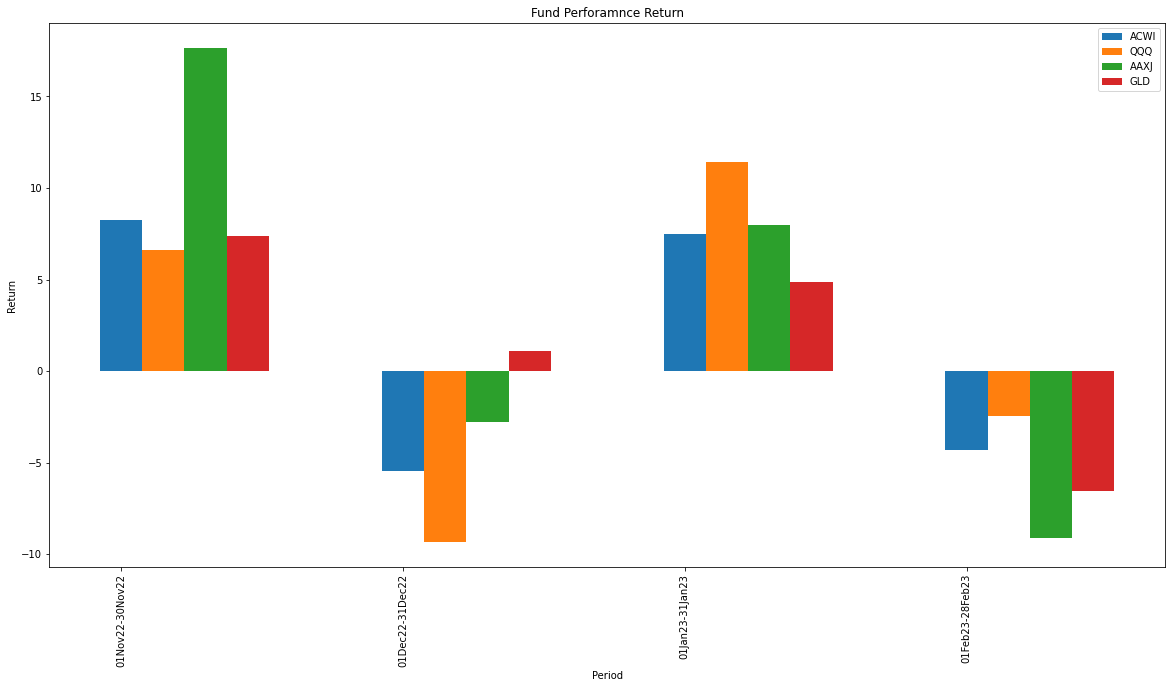

In [47]:
fundReturn_df=fundPerfByPeriod_df[list_fund_name]
fig = plt.figure(figsize = (20, 10))
X_axis = np.arange(len(fundReturn_df)) # length of column to fix axis=y
X_point=0.00
X_width=0.15

for colName  in fundReturn_df.columns:
    
    plt.bar(X_axis+X_point,fundReturn_df[colName],X_width, label =colName)
    X_point+=X_width

# length of column to fix axis=y
plt.xticks(X_axis, fundReturn_df.index,rotation='vertical')
plt.xlabel("Period")
plt.ylabel("Return")
plt.title(f"Fund Perforamnce Return")
plt.legend()

plt.savefig(f'{report_path}\\Return_{from_str}_{to_str}.png')

plt.show()



In [48]:
fundPerfByPeriod_df

,Start_Date,End_Date,ACWI,QQQ,AAXJ,GLD,_AVG_
Period,,,,,,,
01Nov22-30Nov22,2022-11-01,2022-11-30,8.23,6.63,17.66,7.40,9.98
01Dec22-31Dec22,2022-12-01,2022-12-31,-5.48,-9.34,-2.78,1.07,-4.13
01Jan23-31Jan23,2023-01-01,2023-01-31,7.48,11.40,7.96,4.88,7.93
01Feb23-28Feb23,2023-02-01,2023-02-28,-4.30,-2.45,-9.11,-6.54,-5.60


In [49]:
def find_rank(fund_temp,list_fundX,FinalRank_ColName):
     fundPerfRank=fund_temp[list_fundX]
     fundPerfRank=fundPerfRank.T   
     for colNameToRank in fundPerfRank.columns:
      fundPerfRank[colNameToRank]=fundPerfRank[colNameToRank].rank(method='max')   
     return fundPerfRank

rankCol_name_all='AllRank'
fundRank_df=find_rank(fundPerfByPeriod_df[list_fund_name],list_fund_name,rankCol_name_all)
fundRank_df=fundRank_df.T 
fundRank_df

,ACWI,QQQ,AAXJ,GLD
Period,,,,
01Nov22-30Nov22,3.0,1.0,4.0,2.0
01Dec22-31Dec22,2.0,1.0,3.0,4.0
01Jan23-31Jan23,2.0,4.0,3.0,1.0
01Feb23-28Feb23,3.0,4.0,1.0,2.0


In [50]:
dfSummary=pd.concat([\
                     fundPerfByPeriod_df[list_fund_name].sum().to_frame(name='total_return'),\
                     fundRank_df.sum().to_frame(name='sum_rank_score'),\
                    ],axis=1)
dfSummary.fillna(value=0,inplace=True)
dfSummary

,total_return,sum_rank_score
ACWI,5.93,10.0
QQQ,6.24,10.0
AAXJ,13.73,11.0
GLD,6.81,9.0


In [51]:
dfFinalScore=pd.DataFrame(index=dfSummary.index)
dfFinalScore

""
ACWI
QQQ
AAXJ
GLD


In [52]:
for colNameToRank in dfSummary.columns:
  dfFinalScore[f"{colNameToRank}_rank"]=dfSummary[colNameToRank].rank(method='max')  
dfFinalScore=pd.concat([dfFinalScore,dfFinalScore.sum(axis=1).to_frame("TotalScore")],axis=1)
dfFinalScore

,total_return_rank,sum_rank_score_rank,TotalScore
ACWI,1.0,3.0,4.0
QQQ,2.0,3.0,5.0
AAXJ,4.0,4.0,8.0
GLD,3.0,1.0,4.0


In [53]:
dfSummary=pd.merge(left=dfSummary,right=dfFinalScore,left_index=True,right_index=True)
dfSummary.sort_values(by='TotalScore',ascending=False,inplace=True)
dfSummary.sort_index(axis=1,ascending=False,inplace=True)
dfSummary



,total_return_rank,total_return,sum_rank_score_rank,sum_rank_score,TotalScore
AAXJ,4.0,13.73,4.0,11.0,8.0
QQQ,2.0,6.24,3.0,10.0,5.0
ACWI,1.0,5.93,3.0,10.0,4.0
GLD,3.0,6.81,1.0,9.0,4.0


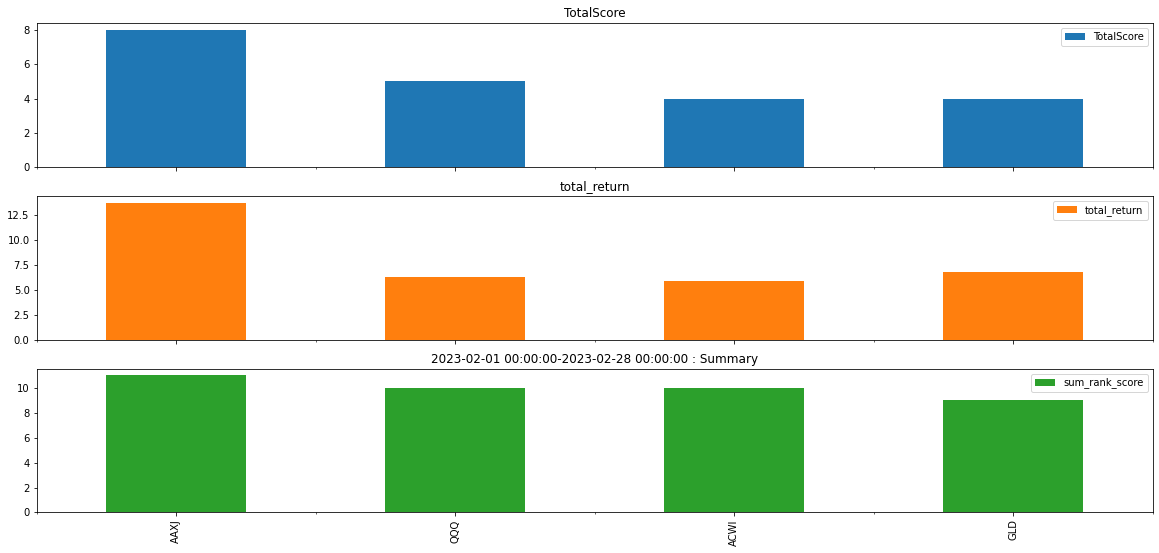

In [54]:
colToPlots=['TotalScore','total_return','sum_rank_score' ]

dfSummary[colToPlots].plot(kind='bar',layout=(len(colToPlots),1),
                      subplots=True,figsize=(20, 3*len(colToPlots)))
plt.title(f"{start_date}-{end_date} : Summary")
plt.savefig(f'{report_path}\\{from_str}-{to_str}-summary.png')
   
plt.show()

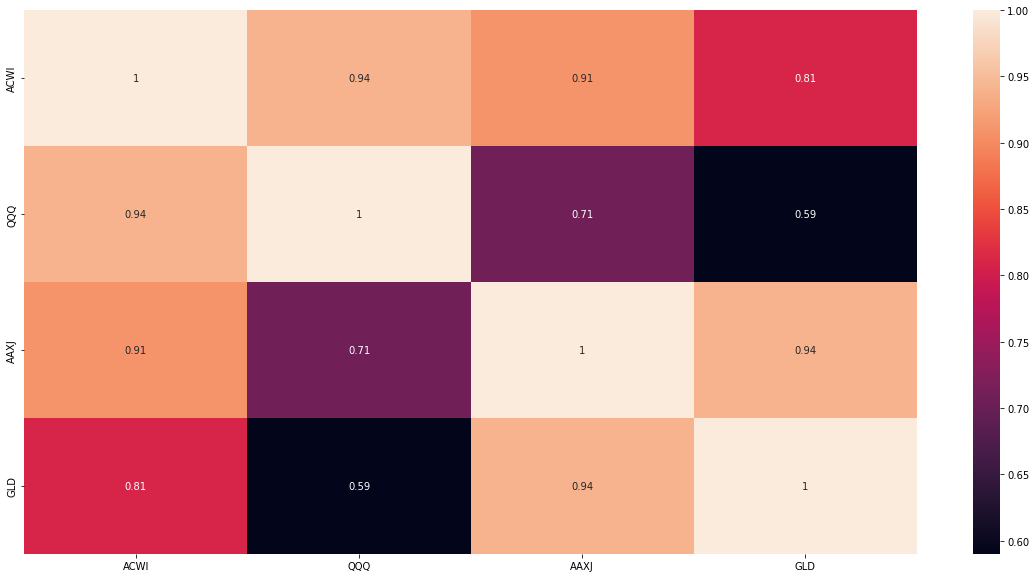

,ACWI,QQQ,AAXJ,GLD
ACWI,1.00,0.94,0.91,0.81
QQQ,0.94,1.00,0.71,0.59
AAXJ,0.91,0.71,1.00,0.94
GLD,0.81,0.59,0.94,1.00


In [55]:


corr_df = fundReturn_df.corr ()  
corr_df = corr_df .round(2)

fig = plt.figure(figsize = (20, 10))
heatmap = seaborn. heatmap(corr_df, annot = True)
plt.savefig(f'{report_path}\\Corr_{from_str}_{to_str}.png')
plt. show ()  

corr_df


In [56]:
report_file = os.path .join(report_path, "Report.xlsx")
writer=pd.ExcelWriter(report_file,engine='xlsxwriter') 

fundPerfByPeriod_df.to_excel(writer, sheet_name="Return")
fundRank_df.to_excel(writer, sheet_name="RANK")
dfSummary.to_excel(writer, sheet_name="Summary")
corr_df.to_excel(writer, sheet_name="Corr",index=True)

writer.save()




C:\Users\pongthsa\AppData\Local\Temp\ipykernel_28436\3854984435.py:9: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()
